## Importing relevant libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None) # set option to display full columns

### Data Preprocess

In [3]:
# wrangle function
def wrangle(filepath):
    # Read csv file into Data Frame
    df = pd.read_csv(filepath)
    # Clean column names
    df = df.rename(columns=lambda x: x.strip().strip('"'))

# Rename columns
    df['pilotstate'] = df['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'']
    df['loadcontrolgridimportexport-n'] = df['zappimode(1=FAST.2=ECO.3=ECO+)']
    df['zappimode'] = df[')']
    df['dsrdataload-n'] = df['loadcontrolgridimportexport']
    df['dsrdataseconds-n'] = df['dsrdataload']

# Drop redundant columns
    df.drop(columns=['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'',
            'zappimode(1=FAST.2=ECO.3=ECO+)', 'loadcontrolgridimportexport', 'dsrdataload', 'dsrdataseconds', ')'], inplace=True)

# Convert time format
    df = df.set_index('timestamp')
    df.index = pd.to_datetime(df.index, unit='s')
    return df


## Loading Dataset

In [4]:
data = wrangle('./Data/chargerdata2_2023_06_10_Anonymized.csv')

data


,id,power,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
timestamp,,,,,,,,,,,
2023-05-01 16:25:12,1,0,False,2389,4997,18.20,A,898,FAST,0,0
2023-05-01 16:25:12,2,0,False,2419,4994,36.53,A,-2219,FAST,0,0
2023-05-01 16:25:12,3,0,False,2408,4995,24.28,A,400,FAST,0,0
2023-05-01 16:25:12,4,0,False,2399,4988,17.44,A,-4,ECO_PLUS,0,0
2023-05-01 16:25:12,5,0,False,2385,4993,4.53,NaN,-4,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 16:25:12,33,0,False,2334,4995,18.97,A,420,FAST,0,0
2023-05-01 16:25:12,34,1148,False,2219,4995,1.21,C2,325,ECO_PLUS,0,0
2023-05-01 16:25:12,35,0,False,2376,4996,0.00,A,30,FAST,0,0


In [6]:
# Sorting data by index in ascending order
data.sort_index(inplace=True)

data

,id,power,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
timestamp,,,,,,,,,,,
2023-02-05 23:43:51,26,1572,False,2380,4990,6.88,C2,-1011,ECO,1282,0
2023-02-05 23:43:51,15,0,False,2475,4996,0.00,A,611,FAST,0,0
2023-02-05 23:43:51,14,0,False,2443,4998,11.92,A,506,ECO_PLUS,0,0
2023-02-05 23:43:51,13,0,False,2374,4998,0.00,A,268,FAST,0,0
2023-02-05 23:43:51,12,7019,False,2256,4998,4.98,C2,8475,FAST,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11 06:38:24,3,0,False,2401,4991,10.44,A,-46,ECO_PLUS,0,0
2023-06-11 06:38:24,4,0,False,2447,4988,18.81,A,4,ECO_PLUS,0,0
2023-06-11 06:38:24,5,0,False,2399,4993,0.00,NaN,4,NaN,0,0


In [7]:
data.isna().sum()

id                                     0
power                                  0
dsrloadcontrolactive                   0
voltage                                0
frequency                              0
chargeenergy                           0
pilotstate                       1015758
loadcontrolgridimportexport-n          0
zappimode                        1015758
dsrdataload-n                          0
dsrdataseconds-n                       0
dtype: int64

### Missing Values

- About 16% of values in pilotstate and zappimode

In [8]:
# checking for unique values in pilotstate and zappimode
print('Pilotstate:', data.pilotstate.unique())
print('Zappimode:', data.zappimode.unique())

Pilotstate: ['C2' 'A' 'B2' nan 'B1' 'C1' 'F']
Zappimode: ['ECO' 'FAST' 'ECO_PLUS' 'STOP' nan]


## Analysis

### Summary Statistics for ALL Charging Stations

In [9]:
data.columns

Index(['id', 'power', 'dsrloadcontrolactive', 'voltage', 'frequency',
       'chargeenergy', 'pilotstate', 'loadcontrolgridimportexport-n',
       'zappimode', 'dsrdataload-n', 'dsrdataseconds-n'],
      dtype='object')

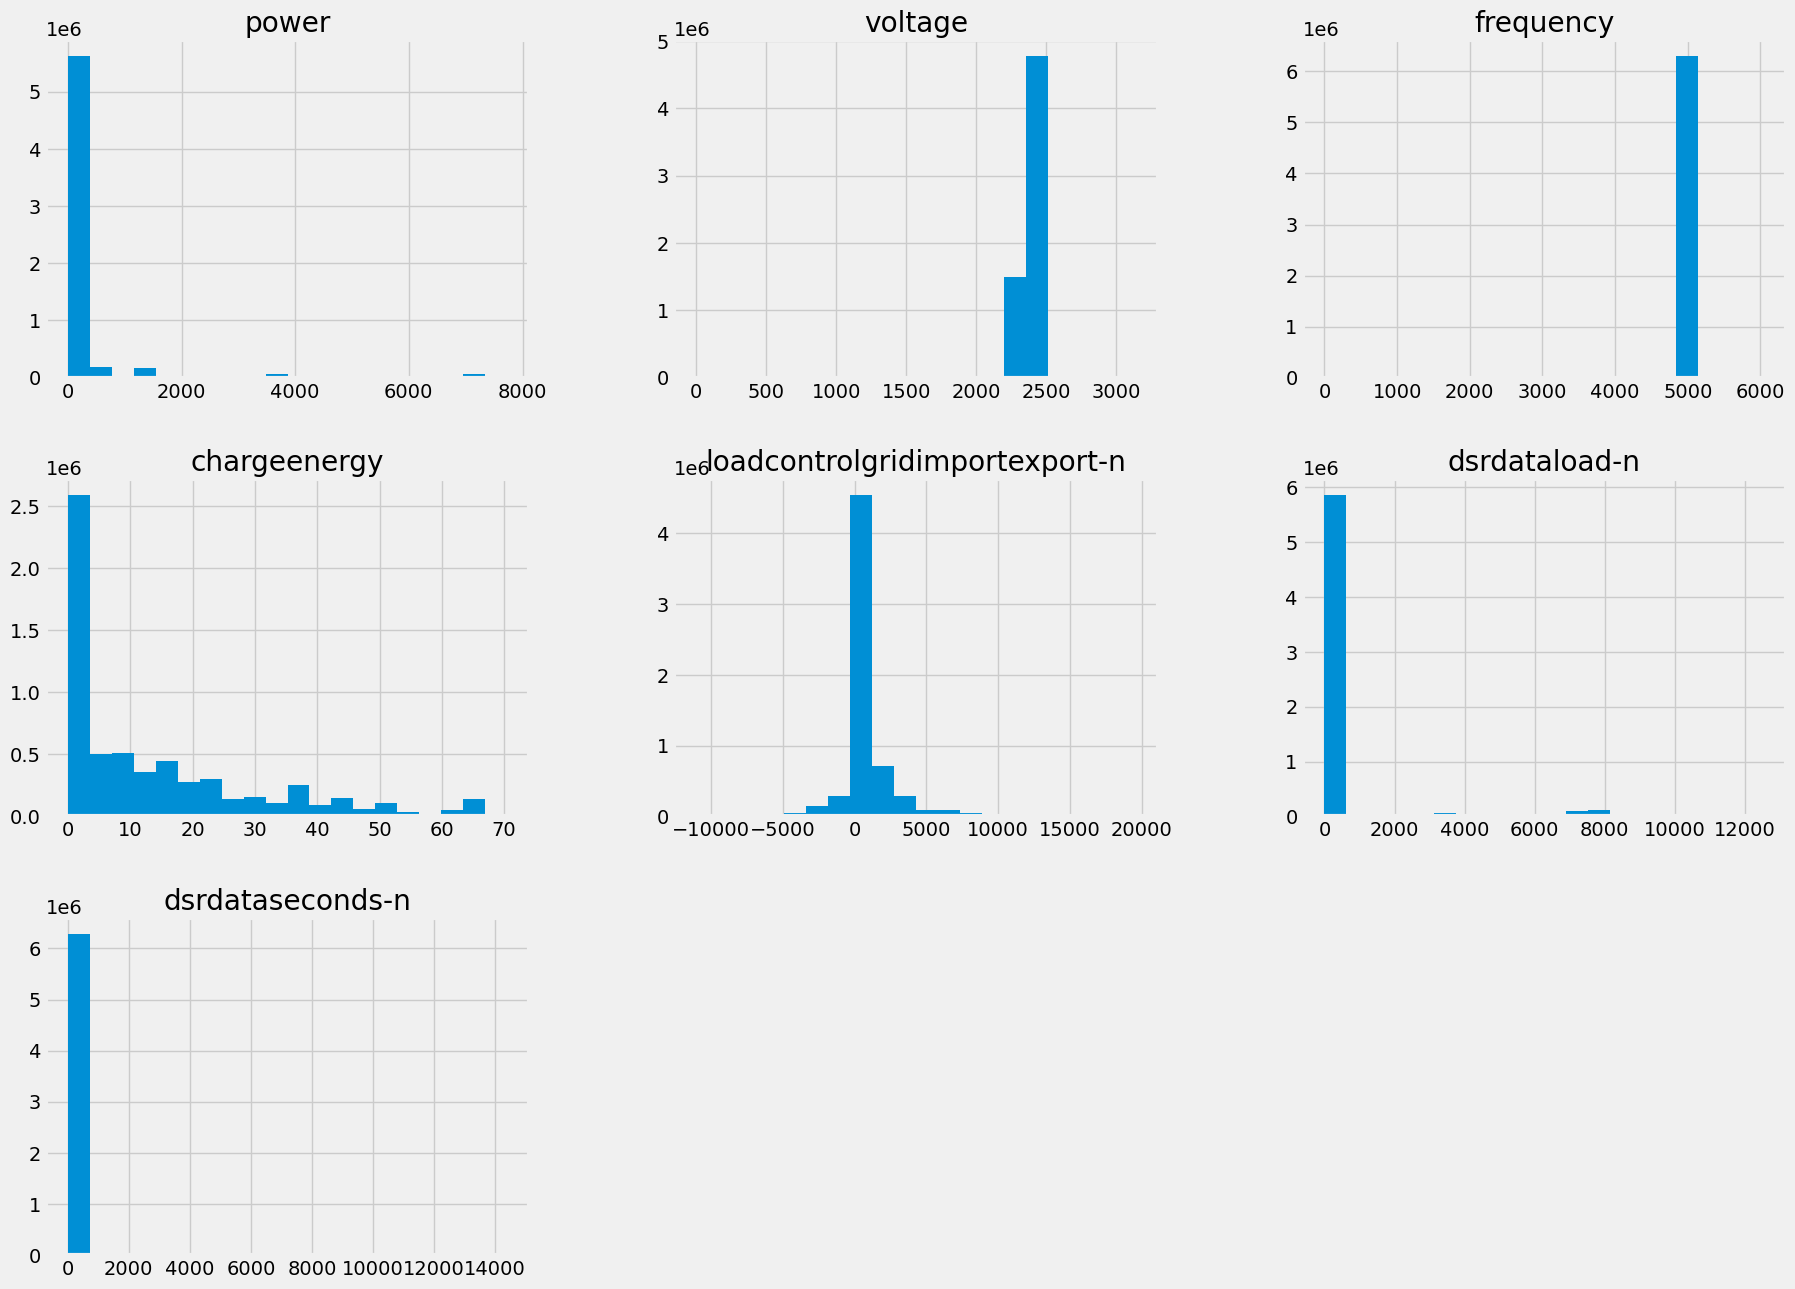

In [19]:
data[['power', 'voltage', 'frequency', 'chargeenergy', 
      'loadcontrolgridimportexport-n','dsrdataload-n','dsrdataseconds-n']].hist(bins=20, figsize=(20,15))
plt.show()

data1[]

In [26]:
# Label Printer
def label_print(ax):
    for p in ax.patches: #Adding labels on bars
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),
                ha = 'center', va ='center', xytext = (0,5), textcoords = 'offset points')

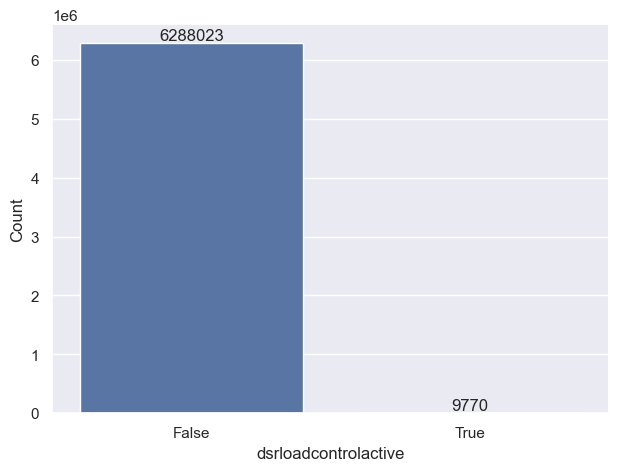

In [29]:
# Creating countplot using Seaborn
sns.set(style='darkgrid')
ax = sns.countplot(x='dsrloadcontrolactive', data=data)

label_print(ax)

#Seting labels
plt.xlabel('dsrloadcontrolactive')
plt.ylabel('Count')
plt.show()

In [22]:
data.dsrloadcontrolactive.value_counts(normalize=True)

False    0.998449
True     0.001551
Name: dsrloadcontrolactive, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

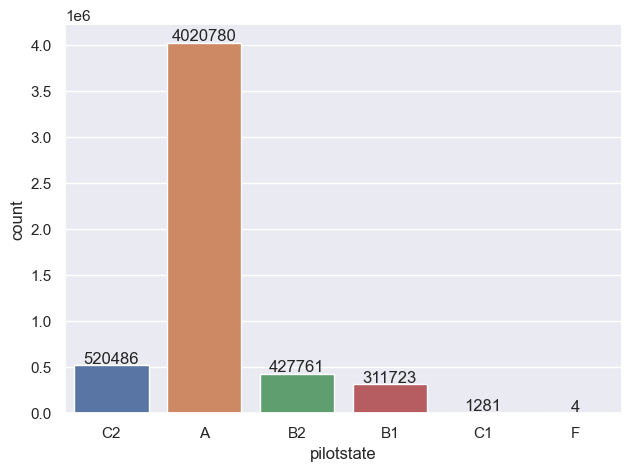

In [100]:
ax = sns.countplot(x='pilotstate', data=data)

label_print(ax)

#Label and plot
plt.xlabel('pilotstate')
plt.ylabel('count')
plt.show

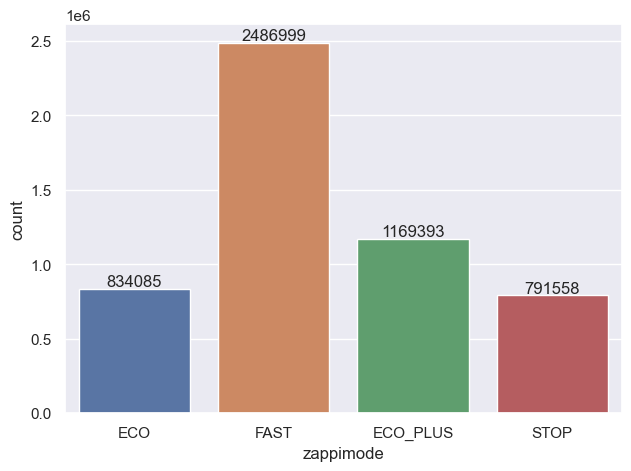

In [30]:
ax = sns.countplot(x='zappimode', data=data)

label_print(ax)

plt.xlabel('zappimode')
plt.ylabel('count')
plt.show()

# EDA

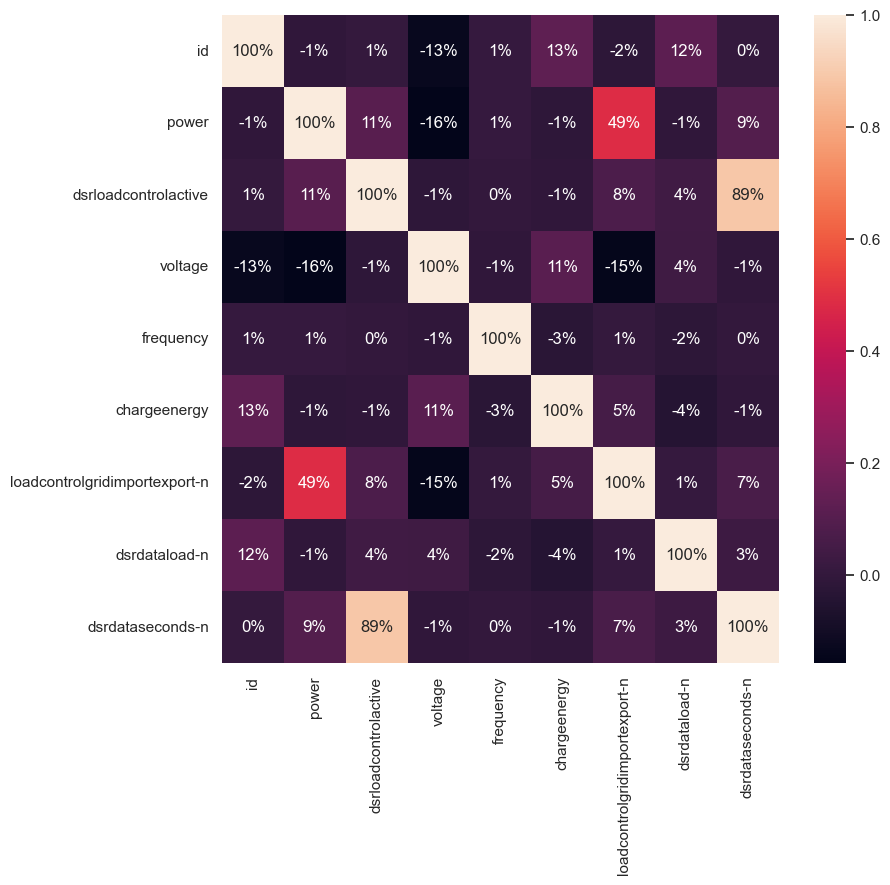

In [32]:
# Plot correlation heatmap

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='.0%', color='Blue')
plt.show()

# Examining Relationship between Power and Other Features

In [93]:
def relationship_check(target, other):
    plt.figure(figsize=(12,8))

    # Determine if other feature is numeric or categorical 
    # If numeric, plot scatterplot
    if (data[other].dtype == 'int64' or data[other].dtype == 'float64'): 
        sns.scatterplot(data=data, x=other, y=target)

    elif (data[other].dtype in ['object'] and data[target].dtype in ['object']):
        print(pd.crosstab(data[target], data[other]))
        
        #If categorical, plot boxplot
    else:
        sns.boxplot(data=data, x=other, y=target)

        
    plt.title("Relationship between " + str(target) + " " + "and"  + " " + str(other))
    plt.show()

In [94]:
# create list of column labels
data.drop(columns=['id'])
data_columns=[]
for col in data.columns:
    if col != 'power' and col != 'id':
        data_columns.append(col)
data_columns.sort()
print(data_columns)
#relationship_check(target='power', other='frequency')

['chargeenergy', 'dsrdataload-n', 'dsrdataseconds-n', 'dsrloadcontrolactive', 'frequency', 'loadcontrolgridimportexport-n', 'pilotstate', 'voltage', 'zappimode']


## Relationship Charts

In [81]:
# import itertools
# #Plot relationship charts
# relationship = []

# for combination in itertools.product(list(data_columns), repeat=2):

#     if combination[0] != combination[1]:
#         relationship.append((combination[0],combination[1]))

# print(relationship)

[('chargeenergy', 'dsrdataload-n'), ('chargeenergy', 'dsrdataseconds-n'), ('chargeenergy', 'dsrloadcontrolactive'), ('chargeenergy', 'frequency'), ('chargeenergy', 'loadcontrolgridimportexport-n'), ('chargeenergy', 'pilotstate'), ('chargeenergy', 'voltage'), ('chargeenergy', 'zappimode'), ('dsrdataload-n', 'chargeenergy'), ('dsrdataload-n', 'dsrdataseconds-n'), ('dsrdataload-n', 'dsrloadcontrolactive'), ('dsrdataload-n', 'frequency'), ('dsrdataload-n', 'loadcontrolgridimportexport-n'), ('dsrdataload-n', 'pilotstate'), ('dsrdataload-n', 'voltage'), ('dsrdataload-n', 'zappimode'), ('dsrdataseconds-n', 'chargeenergy'), ('dsrdataseconds-n', 'dsrdataload-n'), ('dsrdataseconds-n', 'dsrloadcontrolactive'), ('dsrdataseconds-n', 'frequency'), ('dsrdataseconds-n', 'loadcontrolgridimportexport-n'), ('dsrdataseconds-n', 'pilotstate'), ('dsrdataseconds-n', 'voltage'), ('dsrdataseconds-n', 'zappimode'), ('dsrloadcontrolactive', 'chargeenergy'), ('dsrloadcontrolactive', 'dsrdataload-n'), ('dsrloadcon

### Relationship between 'Power' and 'Other' features

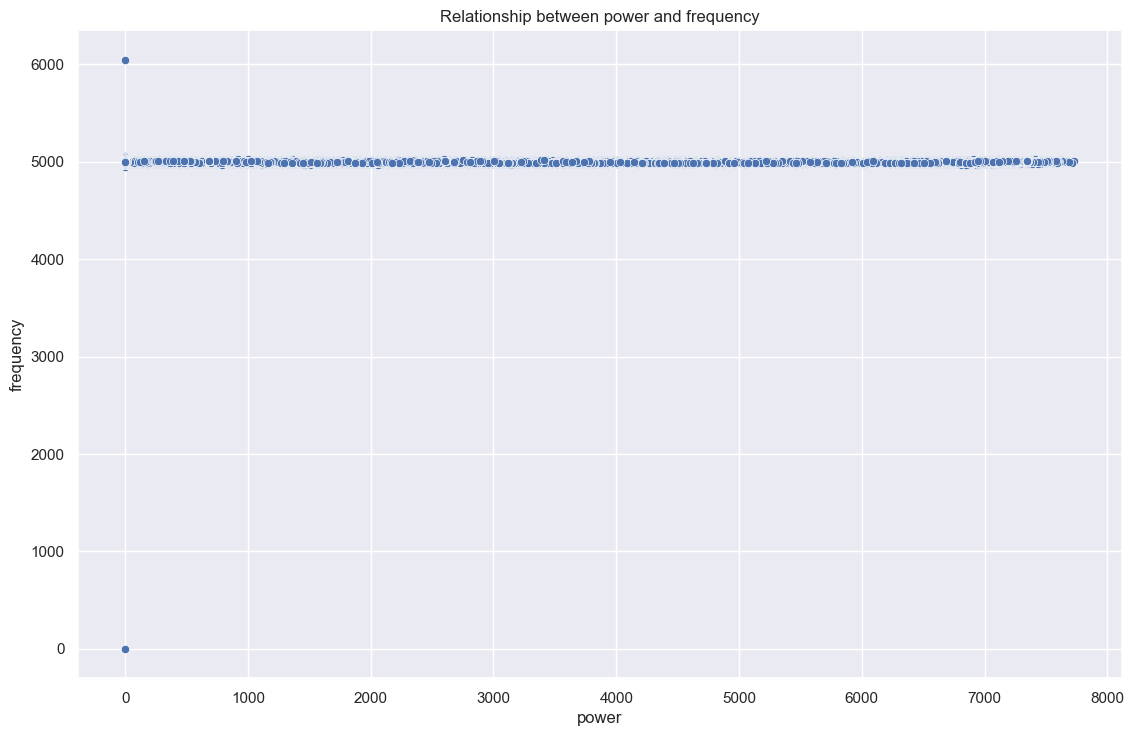

In [83]:
relationship_check(target='power', other='frequency')

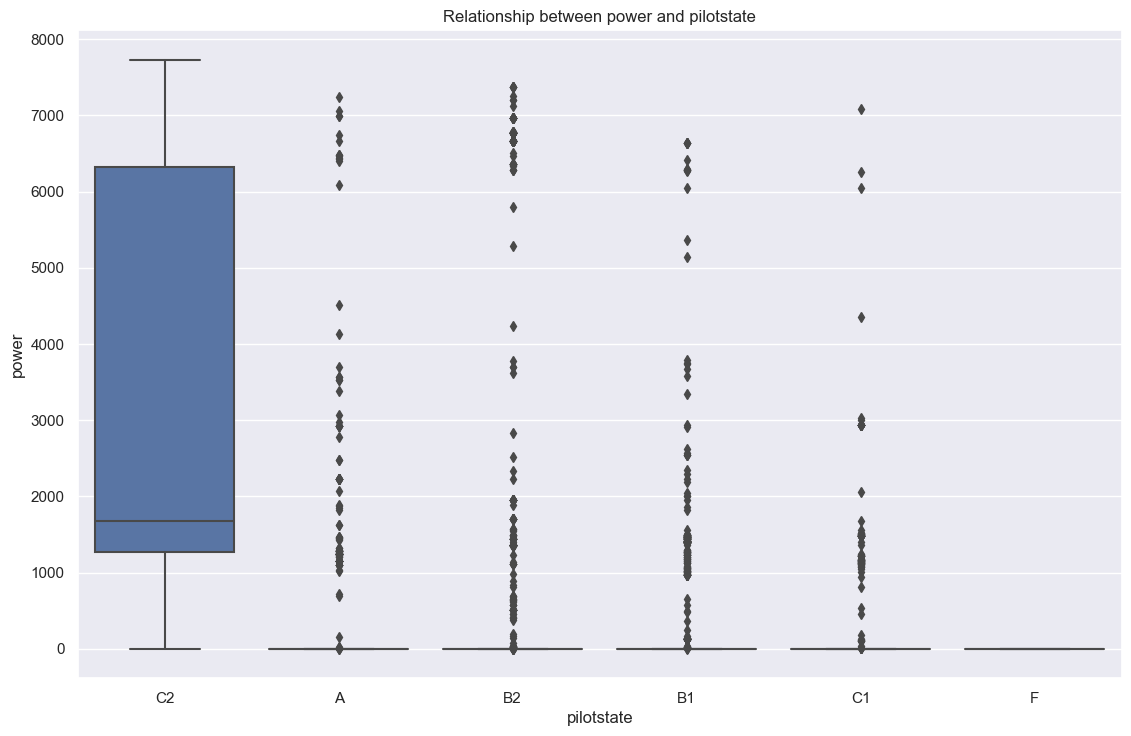

In [86]:
relationship_check(target='power', other='pilotstate')

### NB: When Pilotstate is F (Fault Restart), Power is Zero

In [88]:
data[data.power > 0]['pilotstate'].value_counts()

C2    517379
B2       298
B1       241
A        173
C1       101
Name: pilotstate, dtype: int64

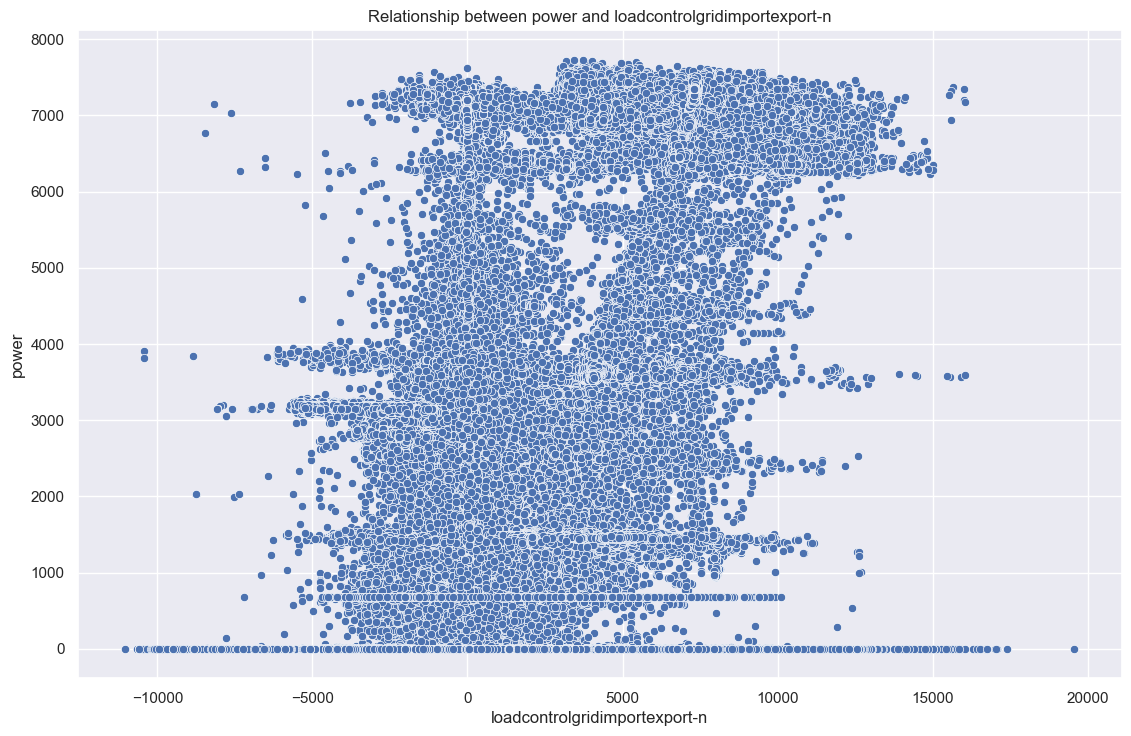

In [89]:
relationship_check(target='power', other='loadcontrolgridimportexport-n')

### Relationship between Voltage and other features

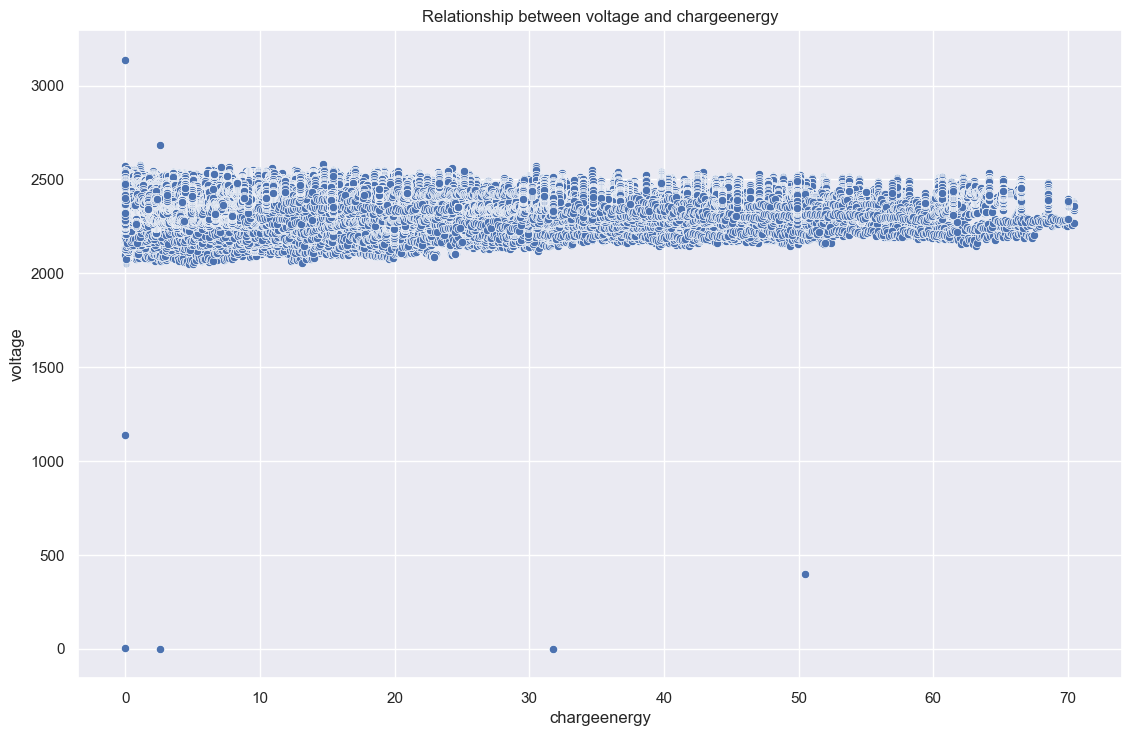

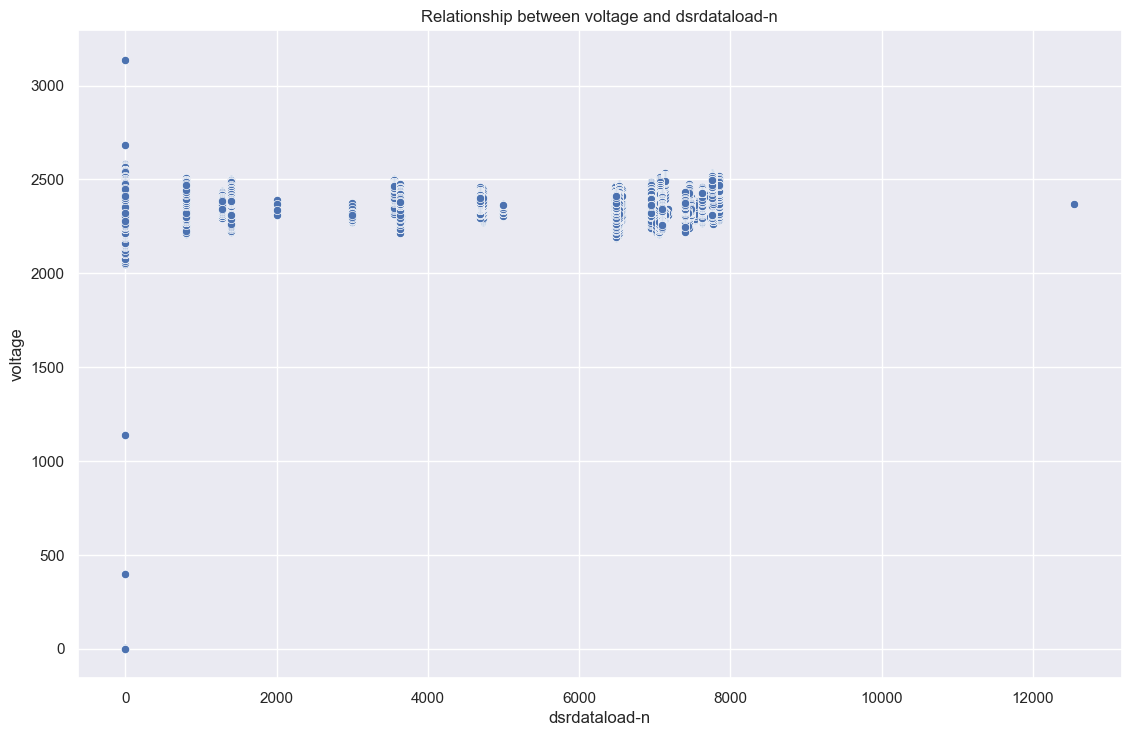

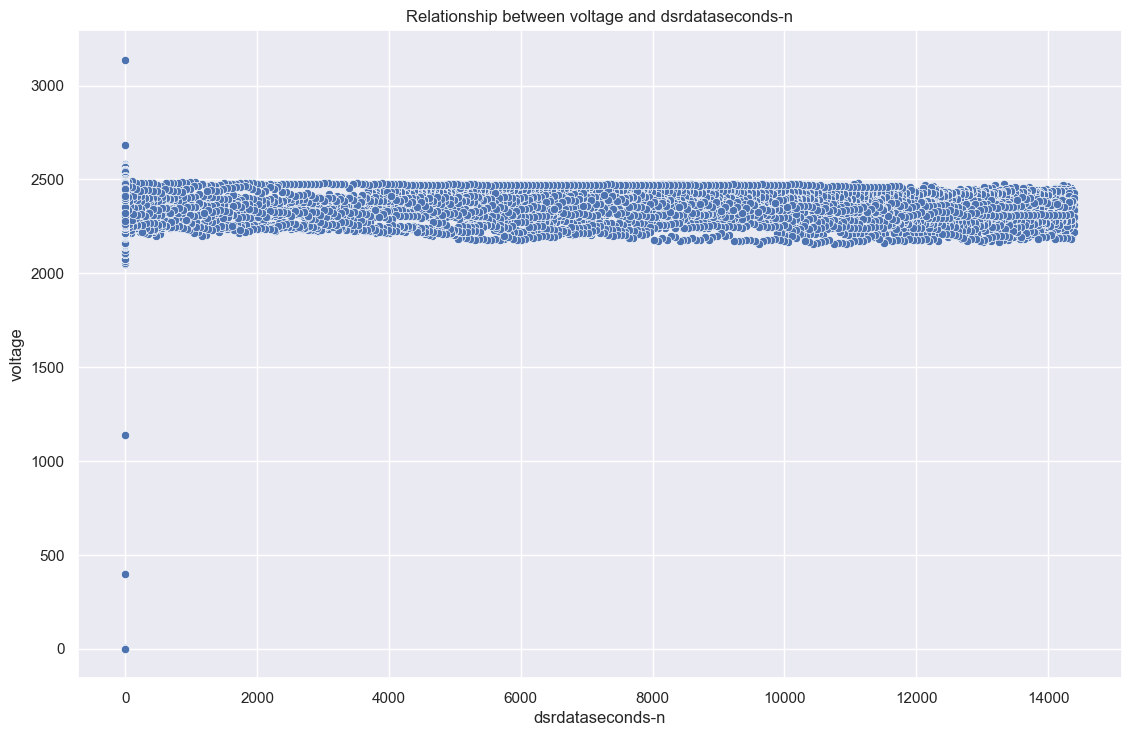

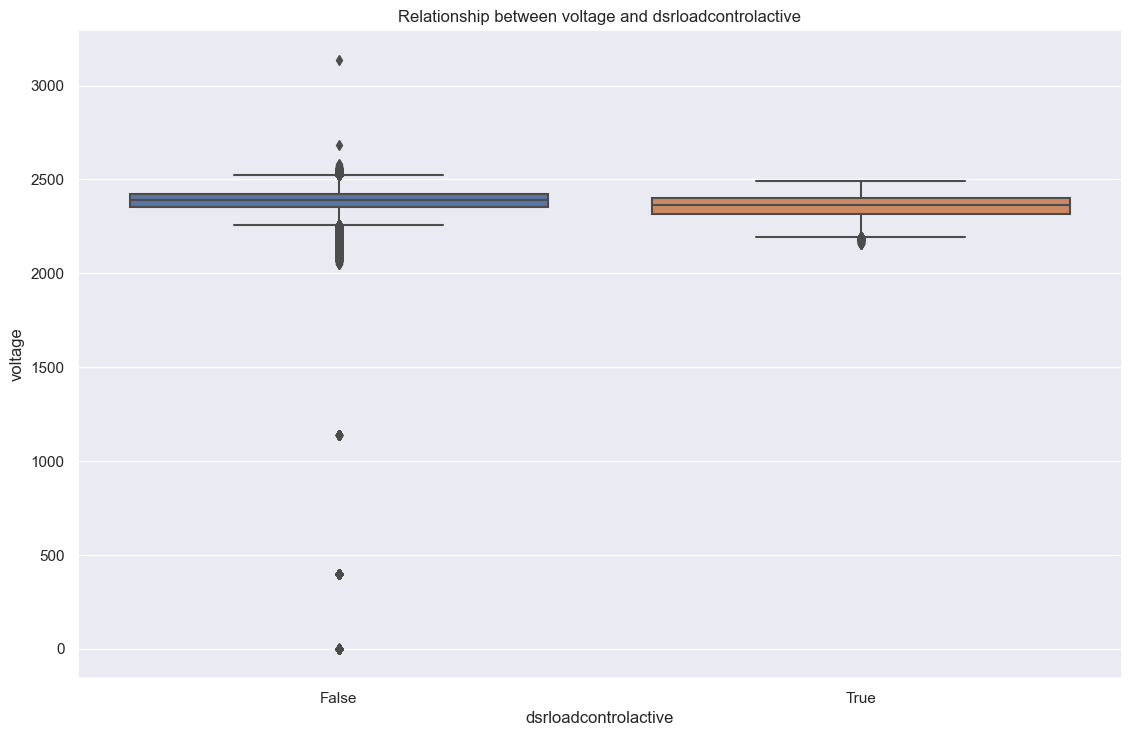

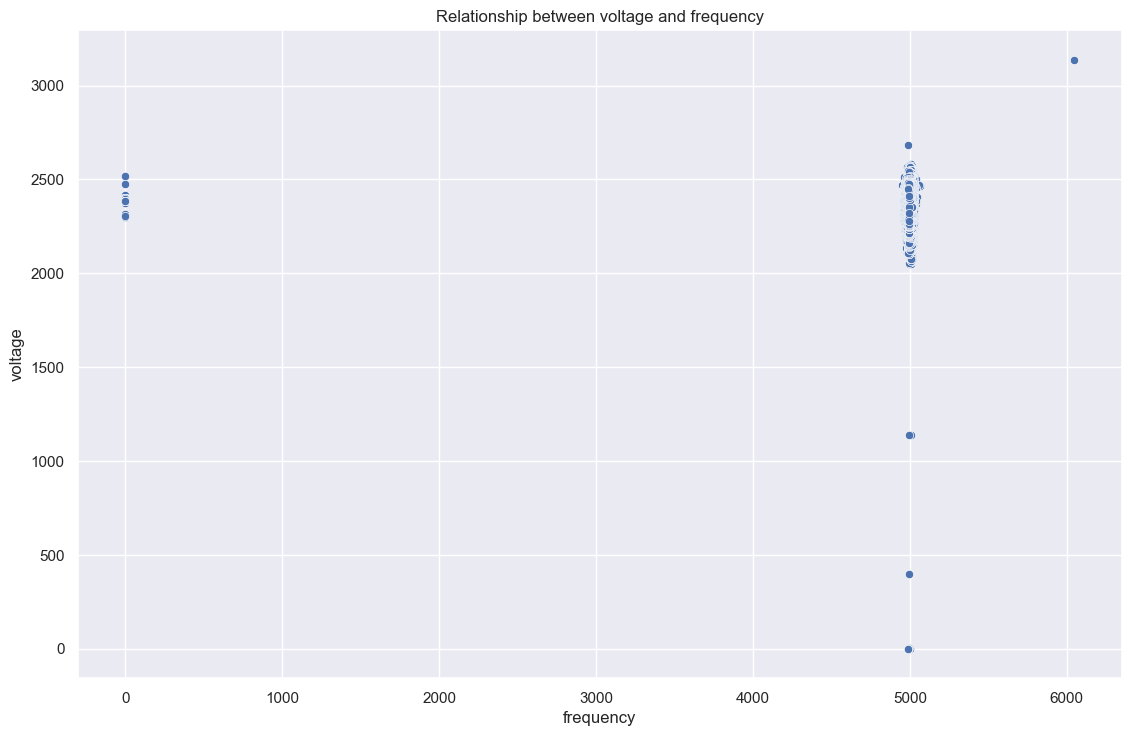

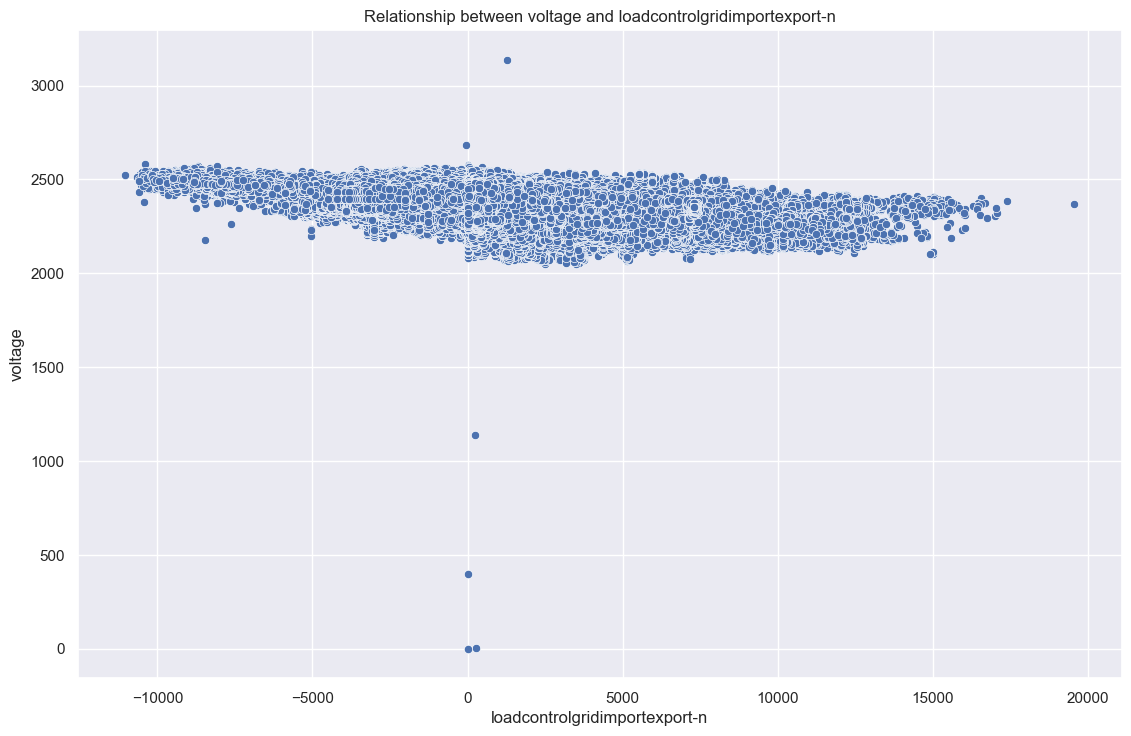

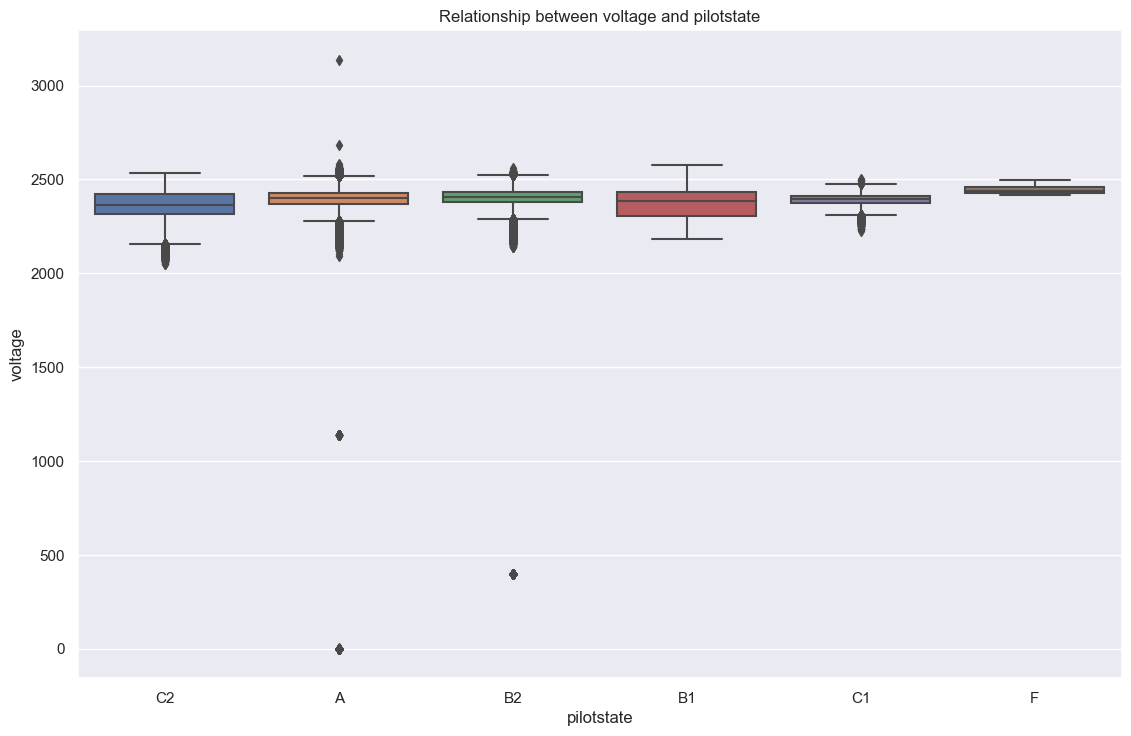

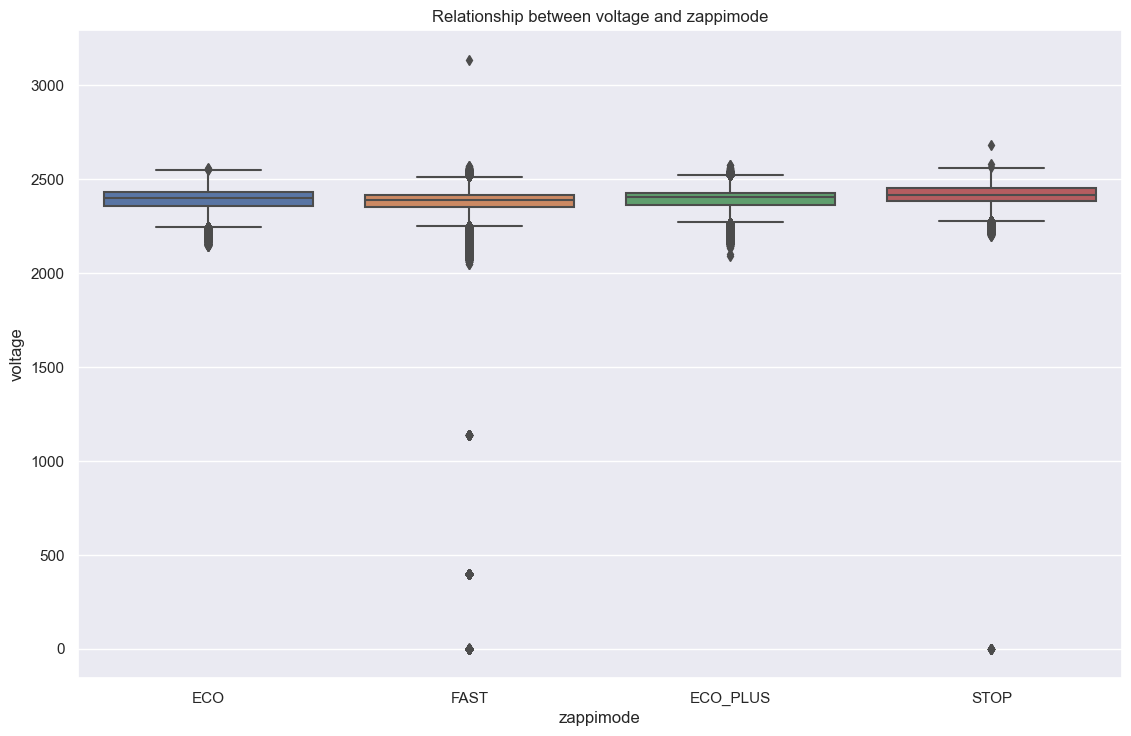

In [90]:
import itertools
#Plot relationship charts


for combination in itertools.product(list(data_columns), repeat=2):

    if combination[0] != combination[1]:
        if combination[0]=='voltage':
            relationship_check(target=combination[0], other=combination[1])



### Relationship between Frequency and other features

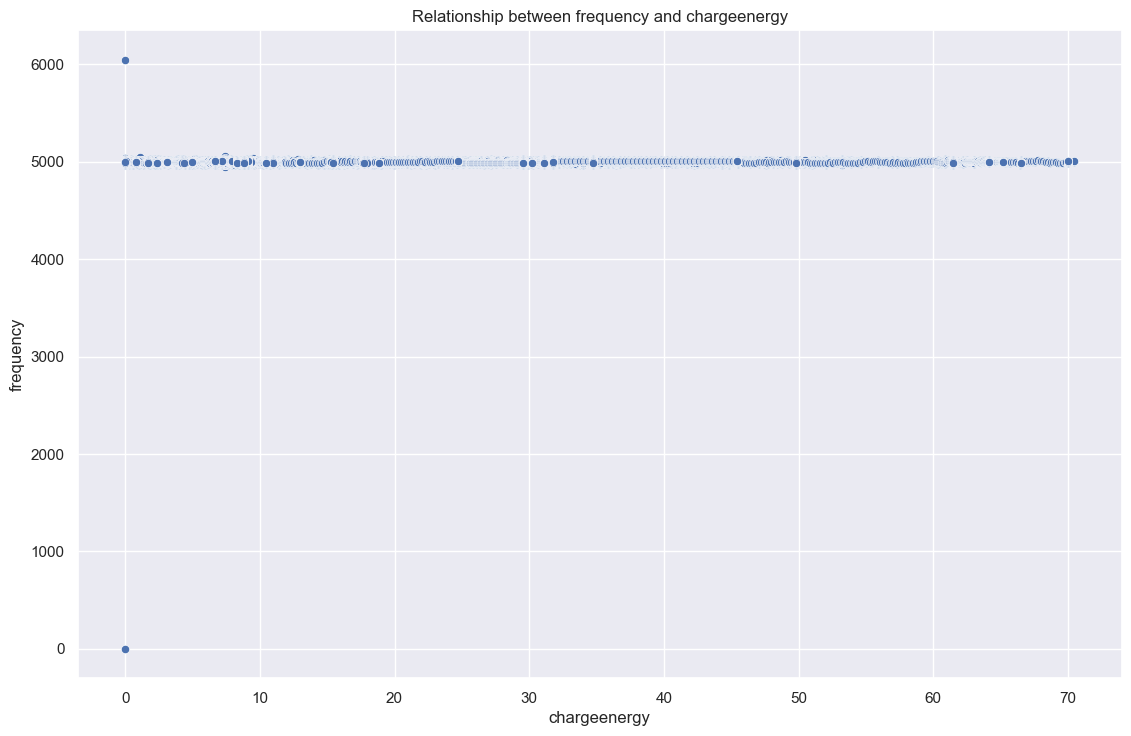

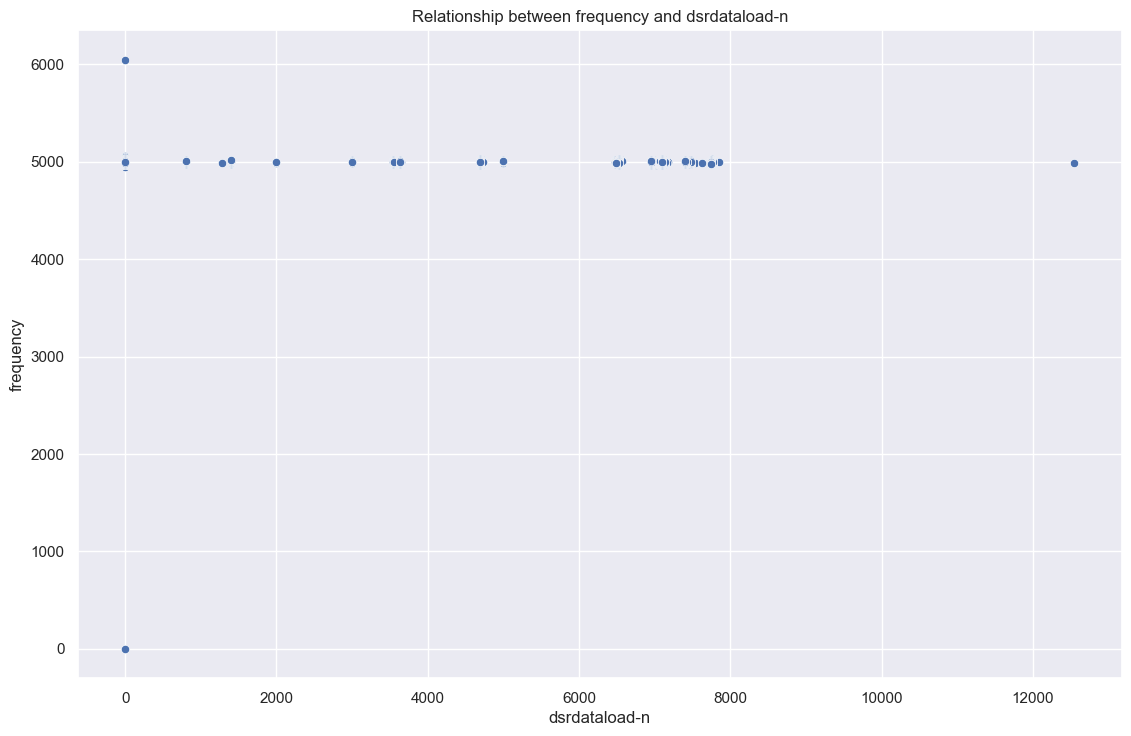

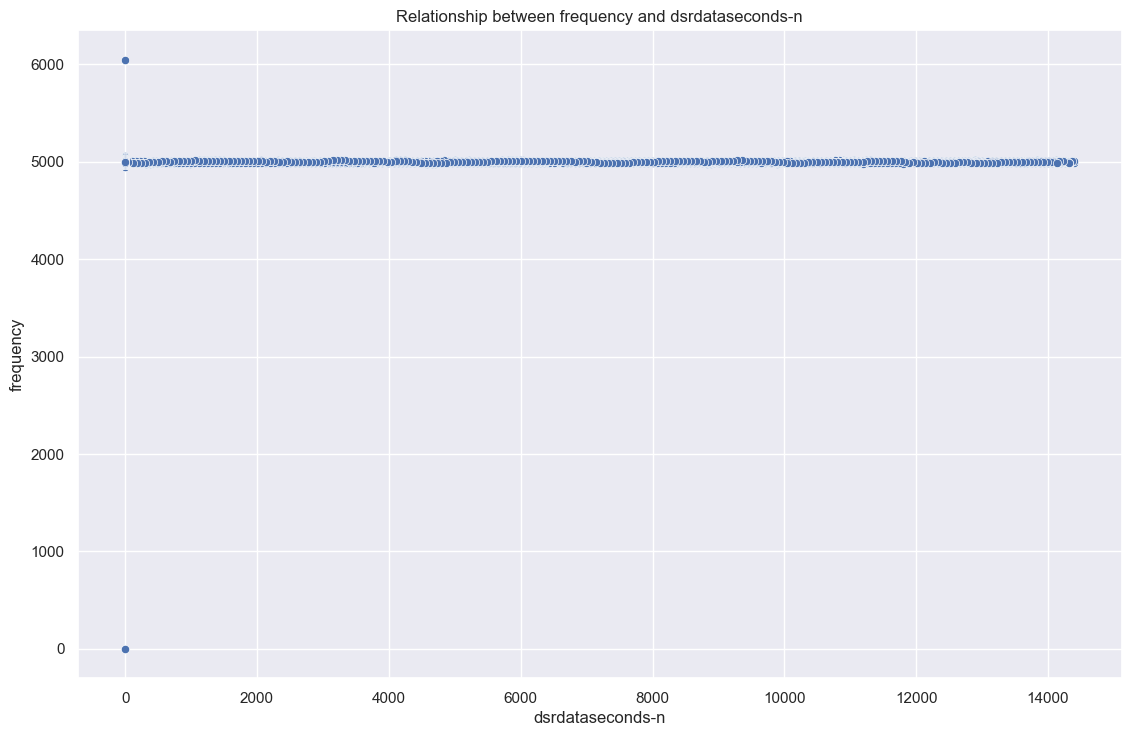

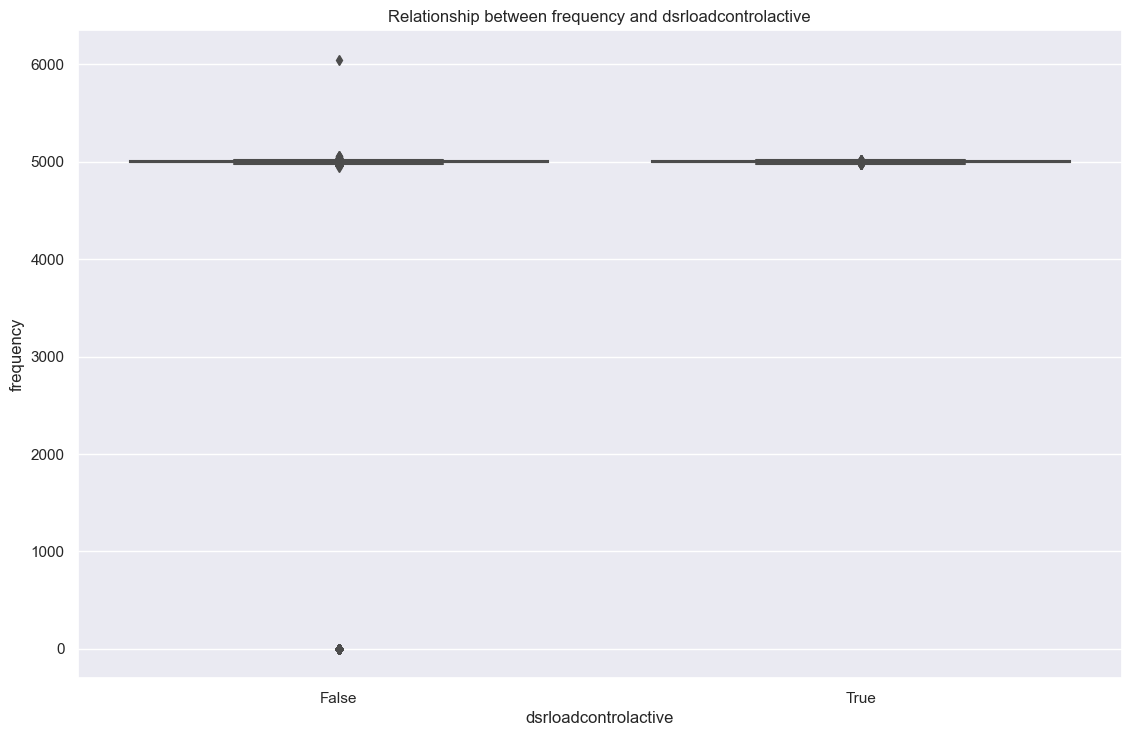

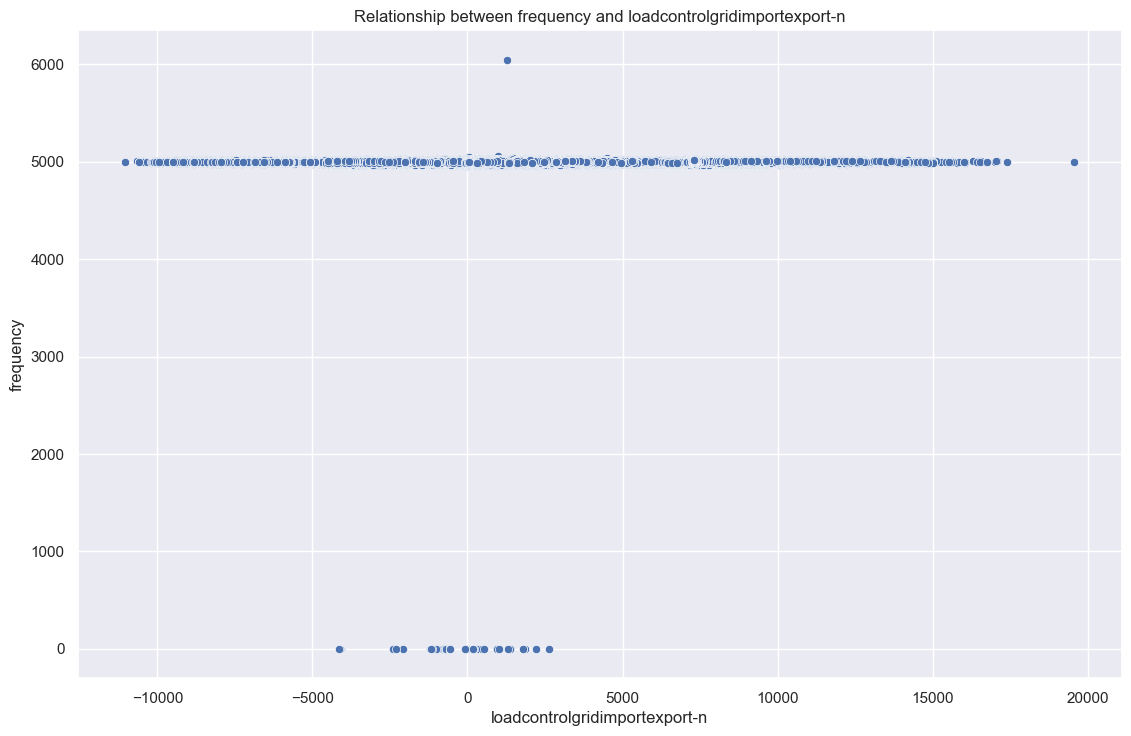

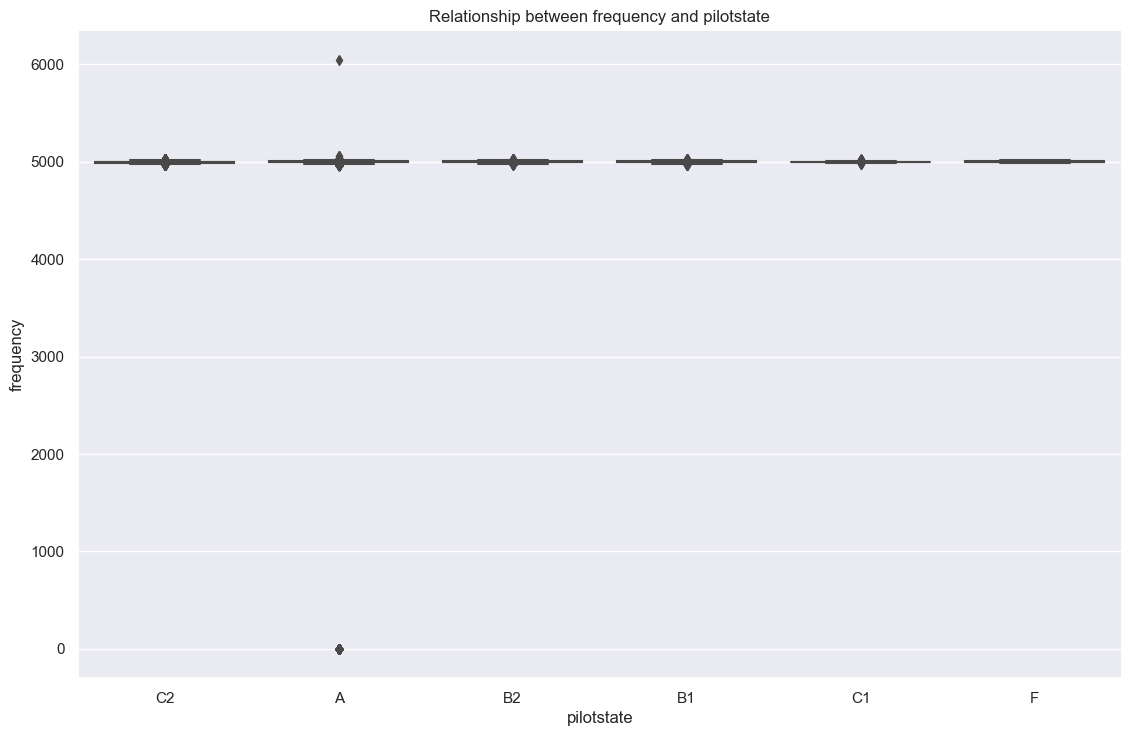

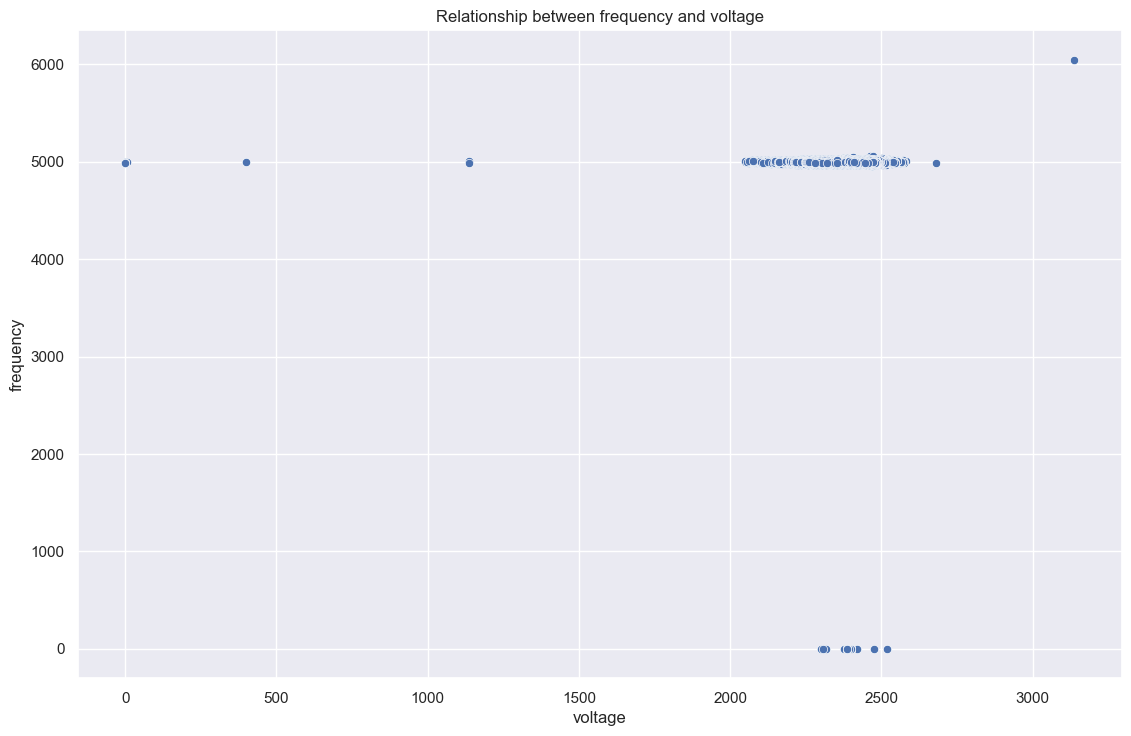

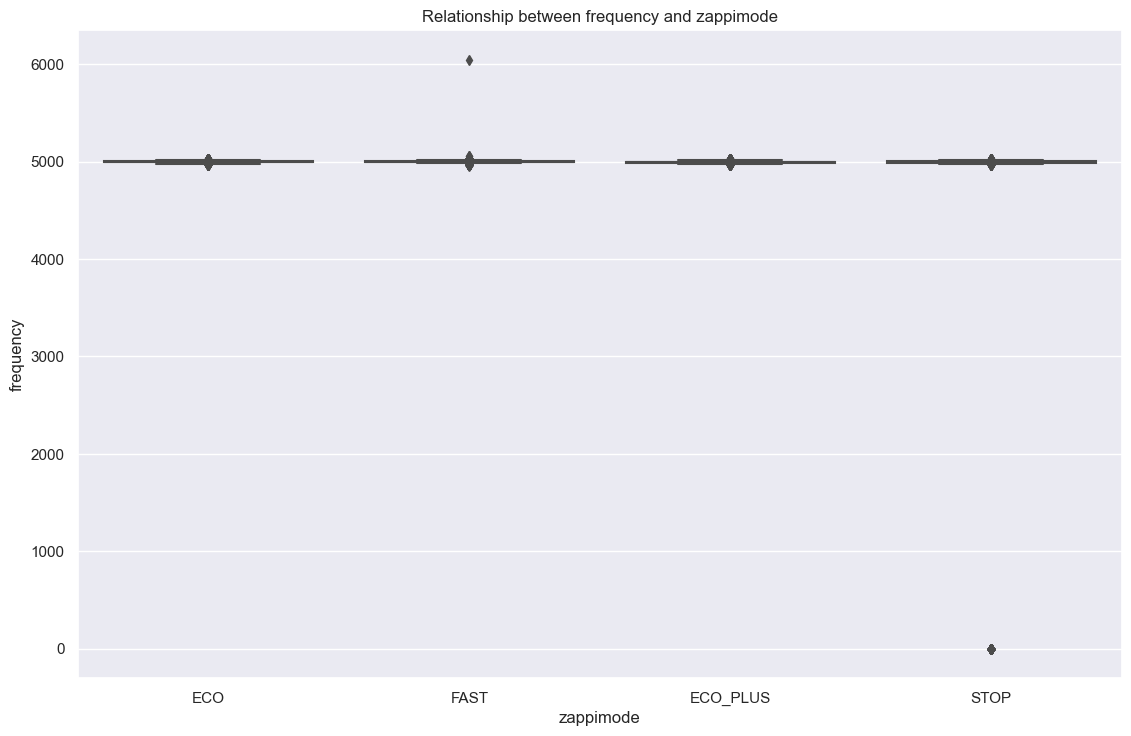

In [103]:
for combination in itertools.product(list(data_columns), repeat=2):

    if combination[0] != combination[1]:
        if combination[0]=='frequency':
            relationship_check(target=combination[0], other=combination[1])

### Relationship between Chargeenergy and other features

In [ ]:
for combination in itertools.product(list(data_columns), repeat=2):

    if combination[0] != combination[1]:
        if combination[0]=='chargeenergy':
            relationship_check(target=combination[0], other=combination[1])